Simulations can be set up to track the progeny of a labelled set of cells.  

There plots to produce the various hallmarks of neutral competition in lineage tracing experiments (see Clayton et al 2007).  

The plots for these simulations, in which there are no additional mutations during the simulation, end with "_for_non_mutation". 

This notebook also explains labelling in the simulations.  

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from clone_competition_simulation import Parameters

# Neutral competition

We start by demonstrating a neutral lineage tracing simulation in a Moran model.   
Later we'll compare the results with the other algorithms.   

For lineage tracing, we want to track the progeny of individual cells.  
We therefore start from single-cell clones.    

In experiment, only a small proportion of the cells can be labelled in order for the individual clones to be tracked.   
In simulations, however, we can track all clones, regardless of whether they are adjacent to any other labelled clones.   

In [3]:
# Run a simulation with 10000 single cell clones.  
p = Parameters(algorithm='Moran', initial_size_array=np.ones(10000), print_warnings=False)
s = p.get_simulator()
s.run_sim()

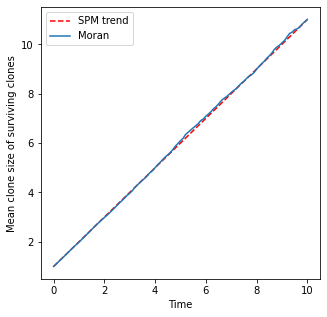

In [4]:
# The mean size of surviving clones increases linearly with time. 
# This matches the rate predicted by Clayton et al 2007 for the progenitor-only clone sizes. 
fig, ax=plt.subplots(figsize=(5, 5))
s.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=True, legend_label='Moran', legend_label_fit='SPM trend',
                                              fit_plot_kwargs={'c': 'r', 'linestyle': '--'}, ax=ax
                                                )
plt.legend()

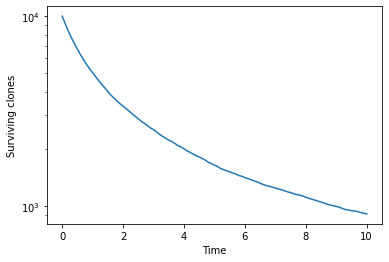

In [5]:
# The number of surviving clones decreases
s.plot_surviving_clones_for_non_mutation()

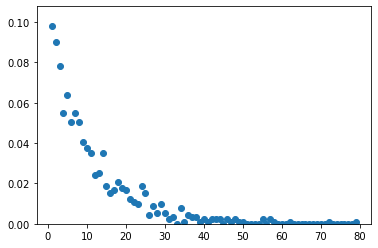

In [6]:
# The distribution of clone sizes can be shown
s.plot_clone_size_distribution_for_non_mutation()

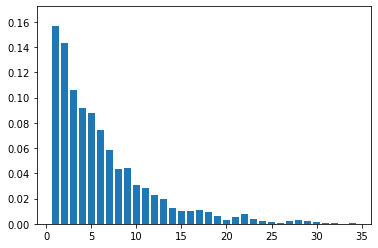

In [7]:
# It can be shown for different time points, or a bar plot
s.plot_clone_size_distribution_for_non_mutation(t=5, as_bar=True)

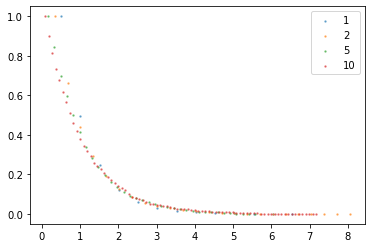

In [8]:
# The scaling of the cumulative distributions (as described in Clayton et al 2007) can also be shown
s.plot_clone_size_scaling_for_non_mutation(times=[1, 2, 5, 10])

The results for the Moran and Branching simulations are very similar (as long as the largest clones are much smaller than the total population size in the Moran simulations).    

The Wright-Fisher simulations have half the rate of drift as the Moran simulations.  
In order to get similar results, the division rate of the Wright-Fisher simulations should be doubled.  


In [9]:
p = Parameters(algorithm='Branching', initial_size_array=np.ones(10000), print_warnings=False)
branch = p.get_simulator()
branch.run_sim()

p = Parameters(algorithm='WF', initial_size_array=np.ones(10000), print_warnings=False)
wf = p.get_simulator()
wf.run_sim()

p = Parameters(algorithm='WF', initial_size_array=np.ones(10000), print_warnings=False, 
              division_rate=2  # The default division rate is 1
              )
wf_double = p.get_simulator()
wf_double.run_sim()

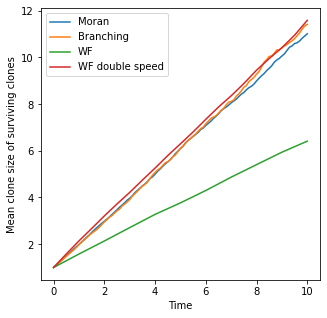

In [10]:
fig, ax=plt.subplots(figsize=(5, 5))
s.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label='Moran', ax=ax)
branch.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label='Branching', ax=ax)
wf.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label='WF', ax=ax)
wf_double.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label='WF double speed', ax=ax)
plt.legend()

Drift in the 2D simulations is reduced as the clone sizes get bigger. This is because in the core of the clone, any cells will be replaced with cells from the same clone. Only events around the edges of clones will change the clones sizes, reducing the rate of drift.  

In [11]:
# Using a grid of 100x100 cells

p = Parameters(algorithm='Moran2D', initial_grid=np.arange(10000).reshape(100, 100), print_warnings=False)
moran2D = p.get_simulator()
moran2D.run_sim()

p = Parameters(algorithm='WF2D', initial_grid=np.arange(10000).reshape(100, 100), print_warnings=False, 
               division_rate=2  # Doubling the division rate here again
              )
wf2d = p.get_simulator()
wf2d.run_sim()

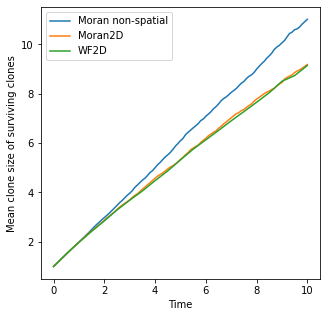

In [12]:
# The mean clone size of 2D simulations starts to drop below the non-spatial simulation at later time points
fig, ax=plt.subplots(figsize=(5, 5))
s.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label='Moran non-spatial', ax=ax)
moran2D.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label='Moran2D', ax=ax)
wf2d.plot_mean_clone_size_graph_for_non_mutation(show_spm_fit=False, legend_label='WF2D', ax=ax)
plt.legend()

# Non-neutral simulations

In this case, some of the clones have a higher fitness.  
In all algorithms except "Branching", if all clones are given the same high fitness, then they will be competing neutrally and you get the same results as assigning all clones a fitness of 1. 


To replicate experiments, we can set up simulations in which most of the tissue is wild type (fitness 1), and a small proportion of the tissue is single-cell clones with a fitness>1.  
This is most easily done using the label_array option to label the wild type and mutant clones separately. 

In [13]:
# Run a simulation with 9950 wild type cells and 50 single-cell clones with higher fitness. 
p = Parameters(algorithm='Moran', 
               initial_size_array=np.concatenate([
                   np.array([9950]),   # The wild type cells tracked as one big clone
                   np.ones(50)]   # 50 single-cell clones
               ), 
               fitness_array=np.concatenate([
                   [1],   # Wild type cells with fitness 1
                   np.full(50, 1.3)  # The next 50 clones given fitness 1.3
               ]), 
               label_array=np.concatenate([
                   [0],  # Wild type clone labelled with 0
                   np.ones(50)  # Mutant clones labelled with 1
               ]),  
               print_warnings=False)
moran_nn = p.get_simulator()
moran_nn.run_sim()

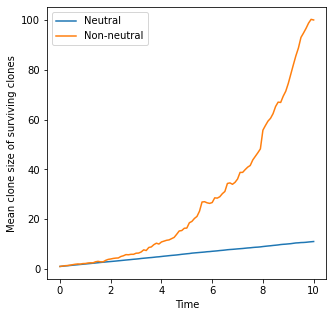

In [14]:
# The clones with fitness>1 grow faster than the neutral clones. 
fig, ax=plt.subplots(figsize=(5, 5))
s.plot_mean_clone_size_graph_for_non_mutation(ax=ax, legend_label='Neutral', show_spm_fit=False)

# Use the label option to plot only the clones labelled with 1. 
moran_nn.plot_mean_clone_size_graph_for_non_mutation(label=1, legend_label='Non-neutral', ax=ax, show_spm_fit=False)

plt.legend()

# Labelling

This is useful for tracking descendants of the labelled cells.  
They act like neutral mutations (or like GFP/YFP labelling in lineage tracing experiments).   

Labels can be defined at the start of the simulation (like above), or can be introduced during the simulation.   

Multiple labels can be added.  

In [15]:
from clone_competition_simulation.colourscales import COLOURSCALE_EXAMPLE1

In [16]:
# To demonstrate labels adding during a simulation, run a sim with mutation, and add labels part way through. 
# Can then track the growth of the labelled clones to the end of the simulation. 
p = Parameters(algorithm='Moran', initial_cells=10000, # Start with 10000 wild type cells
               mutation_rates=0.002,  # Introduce a constant mutation rate. Using the default mutation_generator
               label_times=3,  # Introduce a label part way through
               label_frequencies=0.01,  # label 1% of cells at random
               label_values=1,  # Use the value 1 for the label
               colourscales=COLOURSCALE_EXAMPLE1,  # Set the colours (see Colourscales tutorial)
               print_warnings=False)
moran_label = p.get_simulator()
moran_label.run_sim()

<AxesSubplot:>

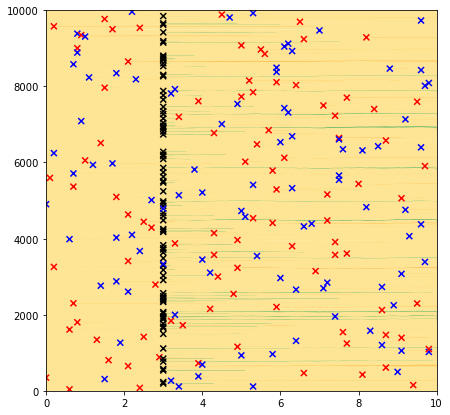

In [17]:
# The labelling events are marked with the black Xs and the clones are green
# The other mutations are marked with red (non-synonymous) and blue (synonymous)
moran_label.muller_plot(figsize=(7, 7))

In [18]:
# Can track the labelled population over time.
# It is zero up until the label is induced. 
moran_label.get_labeled_population(label=1)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  86.,  91.,
        88.,  86.,  91.,  90.,  94.,  91.,  89.,  93.,  89.,  87.,  82.,
        82.,  84.,  85.,  85.,  90.,  86.,  89.,  90.,  96.,  93.,  79.,
        79.,  73.,  77.,  77.,  93.,  87.,  91.,  82.,  78.,  72.,  70.,
        81.,  86.,  91.,  99.,  93.,  99.,  94.,  98.,  94.,  99.,  90.,
        92.,  94.,  94.,  94.,  92.,  90.,  92.,  91.,  95.,  95.,  95.,
        92.,  90.,  91.,  93.,  99.,  95., 100.,  93.,  88.,  88.,  75.,
        73.,  79.])

In experiment, the labelled cells are sometime associated with a mutation that changes cell fitness.  
This can be simuated too, using the label_fitness argument.   

Multiple labels can also be introduced during the experiment.  

In [19]:
p = Parameters(algorithm='Moran', initial_cells=10000, # Start with 10000 wild type cells
               mutation_rates=0.002,  # Introduce a constant mutation rate. Using the default mutation_generator
               label_times=[3, 5],  # Introduce multiple labels
               label_frequencies=[0.01, 0.02],  # label 1% then 2% of cells at random
               label_values=[1, 2],  # Use different values for the labels
               label_fitness=[1.2, 1],  # The first label event increases cell fitness
               colourscales=COLOURSCALE_EXAMPLE1,  # Set the colours (see Colourscales tutorial)
               print_warnings=False)
moran_label2 = p.get_simulator()
moran_label2.run_sim()

<AxesSubplot:>

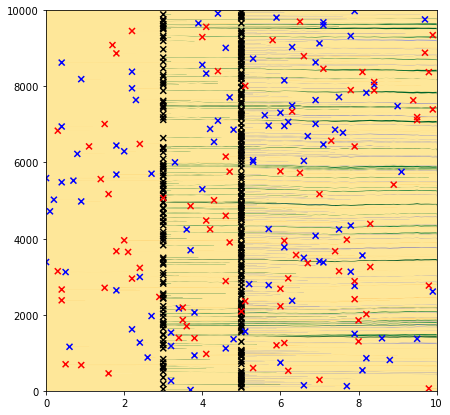

In [20]:
# There are now two labelling events. 
moran_label2.muller_plot(figsize=(7, 7))

Text(0.5, 0, 'Time')

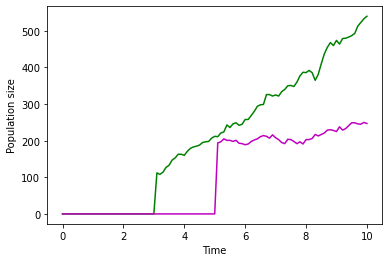

In [21]:
# Can see the first label appears at time 3 and then the labelled population increases because it is fitter
# The second label occurs at time 5 with a higher proportion of cells but is neutral
plt.plot(moran_label2.times, moran_label2.get_labeled_population(label=1), c='g', label='Label1')
plt.plot(moran_label2.times, moran_label2.get_labeled_population(label=2), c='m', label='Label2')
plt.ylabel('Population size')
plt.xlabel('Time')